In [54]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist # dataset of handwritten numbers
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 3)

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss,  val_acc)


Epoch 1/3
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2675 - acc: 0.9231
Epoch 2/3
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1062 - acc: 0.9678
Epoch 3/3
10000/10000 [==============================] - 0s 34us/sample - loss: 0.0969 - acc: 0.9704
0.09689531847722828 0.9704


In [47]:
model.save('num_reader.model')

In [48]:
new_model = tf.keras.models.load_model('num_reader.model')

W0709 22:54:55.783789  1240 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


In [49]:
predictions = new_model.predict(x_test)


In [50]:
print(predictions)

[[4.5474330e-08 9.8630345e-08 3.7750203e-06 ... 9.9998343e-01
  6.2416092e-08 9.9442173e-07]
 [5.4564203e-10 7.3161195e-03 9.9267769e-01 ... 9.2906509e-09
  1.3520132e-07 7.1410260e-11]
 [5.1594540e-08 9.9975020e-01 8.1687504e-06 ... 9.3429087e-05
  6.3974119e-05 2.9427279e-06]
 ...
 [5.8719710e-11 1.5606307e-06 4.7175777e-07 ... 1.5996359e-04
  8.9046385e-05 4.9485880e-05]
 [1.4139729e-06 1.6845212e-05 1.5511065e-05 ... 1.8400515e-05
  1.2430047e-02 8.5835630e-08]
 [2.4536143e-06 1.5837737e-06 6.3478069e-06 ... 8.3338429e-09
  1.5371351e-06 1.2922760e-08]]


In [61]:
import numpy as np
print(np.argmax(predictions[3]))

0


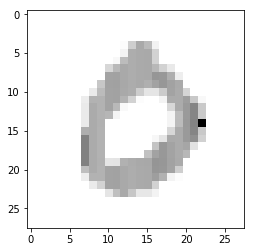

In [62]:
plt.imshow(x_test[3],cmap=plt.cm.binary)
plt.show()


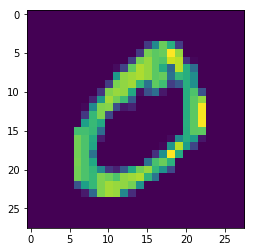

In [59]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()
#print(x_train[0])